In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.lines import Line2D
import re
matplotlib.rc('text',usetex=True)
matplotlib.rcParams['font.family'] = 'sans'
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['legend.fontsize'] = 10
matplotlib.rcParams['font.serif'] = ['Times New Roman']
matplotlib.rcParams['lines.linewidth'] = 1.5
matplotlib.rcParams['lines.markersize'] = 5
matplotlib.rcParams['lines.markeredgewidth'] = 2
matplotlib.rcParams['axes.linewidth'] = 1.5
matplotlib.rcParams['xtick.major.size'] = 5
matplotlib.rcParams['xtick.minor.size'] = 2
matplotlib.rcParams['ytick.major.size'] = 5
matplotlib.rcParams['ytick.minor.size'] = 2

In [2]:
#Load data

#RVS
water2_rvs_file = 'result-water2-rvs-aug-cc-pvtz.dat'
zn_h2o_rvs_file = 'result-zn-hoh-rvs-aug-cc-pvtz.dat'

rvs = {}
rvs['water2'] = pd.read_csv(water2_rvs_file,sep='\s+',header=0,comment='#')
rvs['zn_h2o'] = pd.read_csv(zn_h2o_rvs_file,sep='\s+',header=0,comment='#')

In [3]:
rvs['water2']

Elec    Rep     E1   Pol    Ct    E2   Tot
1.54 -19.11  30.50  11.39 -4.93 -4.23 -9.16  1.97
1.74 -12.44  14.82   2.38 -2.47 -2.04 -4.51 -2.27
1.84 -10.20  10.32   0.12 -1.80 -1.41 -3.21 -3.19
1.94  -8.45   7.16  -1.28 -1.32 -0.99 -2.31 -3.66
2.03  -7.17   5.12  -2.06 -1.00 -0.72 -1.72 -3.83
2.14  -6.00   3.46  -2.54 -0.73 -0.51 -1.24 -3.83
2.24  -5.14   2.41  -2.73 -0.56 -0.37 -0.93 -3.70
2.34  -4.44   1.67  -2.77 -0.43 -0.28 -0.71 -3.51
2.54  -3.41   0.81  -2.60 -0.27 -0.16 -0.43 -3.04
3.04  -1.97   0.13  -1.84 -0.10 -0.05 -0.15 -1.99
4.04  -0.86   0.00  -0.86 -0.02 -0.01 -0.03 -0.89
5.04  -0.46   0.00  -0.46 -0.01 -0.00 -0.01 -0.46

In [4]:
#CSOV (B3LYP)
water2_csov_file = 'result-water2-csov-aug-cc-pvtz.dat'
zn_h2o_csov_file = 'result-zn-hoh-csov-aug-cc-pvtz.dat'

csov = {}
csov['water2'] = pd.read_csv(water2_csov_file,sep='\s+',header=0,comment='#')
csov['zn_h2o'] = pd.read_csv(zn_h2o_csov_file,sep='\s+',header=0,comment='#')

In [5]:
csov['water2']

Ind     Ct    Pol
1.54 -11.335 -6.198 -5.137
1.74  -6.018 -3.386 -2.632
1.84  -4.456 -2.526 -1.930
1.94  -3.325 -1.905 -1.420
2.03  -2.568 -1.490 -1.078
2.14  -1.927 -1.135 -0.792
2.24  -1.496 -0.892 -0.604
2.34  -1.173 -0.704 -0.469
2.54  -0.737 -0.445 -0.292
3.04  -0.263 -0.149 -0.114
4.04  -0.048 -0.026 -0.022
5.04  -0.016 -0.010 -0.006

In [6]:
#ALMO (PBE0)

water2_almo_file = 'result-water2-almo-aug-cc-pvtz-pbe0.dat'
zn_h2o_almo_file = 'result-zn-hoh-almo-aug-cc-pvtz-pbe0.dat'

almo = {}
almo['water2'] = pd.read_csv(water2_almo_file,sep='\s+',header=0,comment='#')
almo['zn_h2o'] = pd.read_csv(zn_h2o_almo_file,sep='\s+',header=0,comment='#')

#attention No dATA for Zn...H2O at 3.O Ang with almo (not converged) --> use distance of the almo file

In [7]:
almo['zn_h2o']

d        FRZ        POL     RS-Ct1    SCF-Ct1      RS-TOT     SCF-TOT
0   1.5  41.199475 -86.902345  -7.742023  -8.146587  -53.444893  -53.849456
1   1.6   1.557838 -77.180562  -6.006331  -6.325673  -81.629057  -81.948399
2   1.7 -21.334423 -69.423250  -5.176260  -5.452620  -95.933933  -96.210294
3   1.8 -33.892753 -62.715653  -5.044508  -5.303099 -101.652914 -101.911502
4   1.9 -40.350970 -56.651093  -5.151308  -5.403981 -102.153370 -102.406044
5   2.0 -42.710648 -50.985624  -5.850978  -6.098355  -99.547250  -99.794627
6   2.1 -42.686275 -45.589666  -6.915357  -7.146915  -95.191298  -95.422856
7   2.2 -42.146383 -40.512778  -7.306603  -7.503415  -89.965761  -90.162573
8   2.3 -40.894793 -35.777681  -7.710255  -7.845476  -84.382729  -84.517950
9   2.4 -38.723387 -31.402657  -8.655870  -8.696448  -78.781914  -78.822492
10  2.5 -36.416616 -27.430530  -9.556154  -9.463353  -73.403300  -73.310497
11  2.6 -34.549747 -23.900289  -9.946762  -9.658437  -68.396798  -68.108473
12  2.7 -32.622793 -20.791717 -10.422135  -9.855308  -63.836647  -63.269818
13  2.8 -30.481171 -18.073197 -15.416186 -10.274467  -63.970554  -58.828834
14  2.9 -28.394933 -15.699449 -38.662411 -10.707551  -82.756790  -54.801930
15  2.9 -28.394933 -15.699449 -38.662411 -10.707551  -82.756790  -54.801930

In [8]:
#SAPTDFT(PBE0)||AC||NoS^2

water2_saptdft_pbe0_file = 'result-water2-saptdft-aug-cc-pvtz-pbe0.dat'
zn_h2o_saptdft_pbe0_file = 'result-zn-hoh-saptdft-aug-cc-pvtz-pbe0.dat'

saptdft_pbe0 = {}
saptdft_pbe0['water2'] = pd.read_csv(water2_saptdft_pbe0_file,sep='\s+',header=0,comment='#')
saptdft_pbe0['zn_h2o'] = pd.read_csv(zn_h2o_saptdft_pbe0_file,sep='\s+',header=0,comment='#')



In [9]:
abs(saptdft_pbe0['water2']['CT'])

0     1.64289
1     0.71861
2     0.48210
3     0.32696
4     0.23071
5     0.15550
6     0.10830
7     0.07506
8     0.03481
9     0.00327
10    0.00098
11    0.00037
Name: CT, dtype: float64

In [10]:
#SAPTDFT(PBE0)||AC||S^2

water2_saptdft_pbe0_s2_file = 'result-water2-saptdft-aug-cc-pvtz-pbe0-s2.dat'
zn_h2o_saptdft_pbe0_s2_file = 'result-zn-hoh-saptdft-aug-cc-pvtz-pbe0-s2.dat'

saptdft_pbe0_s2 = {}
saptdft_pbe0_s2['water2'] = pd.read_csv(water2_saptdft_pbe0_s2_file,sep='\s+',header=0,comment='#')
saptdft_pbe0_s2['zn_h2o'] = pd.read_csv(zn_h2o_saptdft_pbe0_s2_file,sep='\s+',header=0,comment='#')



In [11]:
saptdft_pbe0_s2['water2']

kcal/mol      elst  exch(S2)  IND(S2)      dHF     DISP     Eint  \
0    water2_1 -19.04971  32.19596 -8.05319 -3.08730 -5.54540 -0.45235   
1    water2_2 -12.18824  16.37362 -4.27932 -1.69838 -3.63669 -3.73063   
2    water2_3  -9.88958  11.61746 -3.13090 -1.21111 -2.95943 -4.36246   
3    water2_4  -8.11432   8.21851 -2.30101 -0.85525 -2.41474 -4.61156   
4    water2_5  -6.82896   5.95542 -1.73973 -0.61560 -2.00545 -4.61872   
5    water2_6  -5.65660   4.08200 -1.26468 -0.41325 -1.61929 -4.45858   
6    water2_7  -4.80417   2.86790 -0.94814 -0.28038 -1.33028 -4.21470   
7    water2_8  -4.12488   2.01191 -0.71693 -0.18746 -1.09524 -3.92514   
8    water2_9  -3.13020   0.98646 -0.42106 -0.07562 -0.74703 -3.31183   
9   water2_10  -1.78125   0.16351 -0.13168  0.01342 -0.29930 -2.04871   
10  water2_11  -0.77077   0.00433 -0.02344  0.01124 -0.06109 -0.85096   
11  water2_12  -0.40582   0.00011 -0.00713  0.00512 -0.01760 -0.43044   

         CT      POL  
0  -2.36278 -2.60312  
1  -0.95207 -1.62887  
2  -0.62595 -1.29385  
3  -0.41608 -1.02967  
4  -0.28914 -0.83499  
5  -0.19573 -0.65570  
6  -0.14203 -0.52573  
7  -0.10564 -0.42382  
8  -0.06542 -0.28001  
9  -0.03795 -0.10715  
10 -0.01556 -0.01911  
11 -0.00715 -0.00510

In [12]:
# POL ET CT infinite order - AJM data (SAPT(DFT))
water2_inf_file = 'Pol_daTZ_L3_energies_water2.dat' # need to convert kJ/mol en kcal/mol (*0.24)
zn_h2o_inf_file = 'Model_TTslater_Pol_CT_energy_summary_zn-hoh_pbe0.dat' # need to convert kJ/mol en kcal/mol (*0.24)

inf = {}
inf['water2'] = pd.read_csv(water2_inf_file,sep='\s+',header=0,comment='#')
inf['zn_h2o'] = pd.read_csv(zn_h2o_inf_file,sep='\s+',header=0,comment='#')
#water2: use beta3b_i for pol_inf
#zn_h2o : use pol-TTs for pol_inf


In [13]:
inf['water2']

Index       R   elst    exch     IND     dHF   DISP   Eint       CT  \
0     903  2.5000 -79.06  134.31 -17.245 -18.830 -23.06  -3.88 -6.77177   
1     904  2.7000 -50.93   67.02  -9.701  -8.868 -15.19 -17.66 -2.99589   
2     905  2.8000 -41.49   47.23  -7.385  -6.074 -12.37 -20.09 -2.01556   
3     906  2.9000 -34.18   33.24  -5.667  -4.158 -10.10 -20.87 -1.36128   
4     907  2.9924 -28.86   24.00  -4.465  -2.931  -8.39 -20.64 -0.94953   
5     908  3.1000 -24.00   16.42  -3.407  -1.951  -6.77 -19.71 -0.62512   
6     909  3.2000 -20.45   11.52  -2.667  -1.338  -5.55 -18.48 -0.42393   
7     910  3.3000 -17.60    8.08  -2.100  -0.919  -4.57 -17.11 -0.28746   
8     911  3.5000 -13.40    3.96  -1.328  -0.437  -3.11 -14.32 -0.13287   
9     912  4.0000  -7.65    0.65  -0.467  -0.072  -1.24  -8.78 -0.02209   
10    913  5.0000  -3.31    0.01  -0.086  -0.003  -0.25  -3.64 -0.00077   
11    914  6.0000  -1.75    0.00  -0.023  -0.000  -0.07  -1.84  0.00012   

         POL   beta1a   beta3a  beta1a_i  beta3a_i   beta3b  beta3b_i  
0  -10.47330 -11.0055 -10.5060  -16.3095  -14.9728 -10.8724  -15.8362  
1   -6.70572  -6.8633  -6.6020   -9.1956   -8.6391  -6.7871   -8.9989  
2   -5.37013  -5.4261  -5.2390   -6.9959   -6.6316  -5.3699   -6.8673  
3   -4.30598  -4.2981  -4.1650   -5.3650   -5.1247  -4.2572   -5.2804  
4   -3.51600  -3.4737  -3.3767   -4.2268   -4.0622  -3.4433   -4.1689  
5   -2.78209  -2.7199  -2.6532   -3.2270   -3.1205  -2.6987   -3.1897  
6   -2.24324  -2.1752  -2.1281   -2.5298   -2.4584  -2.1601   -2.5049  
7   -1.81350  -1.7466  -1.7135   -1.9970   -1.9488  -1.7359   -1.9803  
8   -1.19532  -1.1413  -1.1249   -1.2696   -1.2474  -1.1359   -1.2620  
9   -0.44520  -0.4282  -0.4254   -0.4564   -0.4530  -0.4272   -0.4552  
10  -0.08562  -0.0846  -0.0845   -0.0870   -0.0869  -0.0846   -0.0870  
11  -0.02377  -0.0236  -0.0236   -0.0240   -0.0240  -0.0236   -0.0240

In [14]:
inf['zn_h2o']

indx   Rx    elst     exch     dHF      CT2     POL2  pol2-TTs  pol-TTs
0      1  1.5 -795.54  1011.23  95.830 -184.868 -255.330   -272.30  -287.70
1      2  1.6 -615.93   659.87  79.861 -147.697 -238.051   -250.60  -264.00
2      3  1.7 -489.79   431.47  60.846 -115.435 -219.918   -227.40  -238.70
3      4  1.8 -399.81   282.79  41.944  -88.689 -200.898   -204.10  -213.40
4      5  1.9 -334.29   185.71  25.041  -67.036 -181.639   -181.60  -189.00
5      6  2.0 -285.64   122.20  11.053  -50.010 -162.776   -160.50  -166.30
6      7  2.1 -248.61    80.54   0.224  -36.810 -144.882   -141.20  -145.70
7      8  2.2 -219.76    53.17  -7.619  -26.782 -128.239   -123.80  -127.30
8      9  2.3 -196.79    35.15 -12.868  -19.281 -113.063   -108.30  -111.00
9     10  2.4 -178.07    23.26 -15.999  -13.739  -99.392    -94.70   -96.75
10    11  2.5 -162.50    15.41 -17.487   -9.719  -87.189    -82.79   -84.35
11    12  2.6 -149.29    10.22 -17.756   -6.838  -76.427    -72.42   -73.61
12    13  2.7 -137.92     6.78 -17.188   -4.784  -66.974    -63.43   -64.33
13    14  2.8 -128.00     4.50 -16.067   -3.339  -58.874    -55.65   -56.34
14    15  2.9 -119.24     2.99 -14.624   -2.306  -51.547    -48.92   -49.44
15    16  3.0 -111.44     1.99 -13.029   -1.592  -45.304    -43.10   -43.50

In [15]:
#SAPT2

water2_sapt2_file = 'Result-water2-sapt2-aug-cc-pvtz.dat'
zn_h2o_sapt2_file = 'Result-zn-hoh-sapt2-aug-cc-pvtz.dat'

sapt2 = {}
sapt2['water2'] = pd.read_csv(water2_sapt2_file,sep='\s+',header=0,comment='#')
sapt2['zn_h2o'] = pd.read_csv(zn_h2o_sapt2_file,sep='\s+',header=0,comment='#')


In [16]:
sapt2['water2']

Elec        Rep       Ind      Disp       Tot      Ct       dHF
1.54 -19.312220  32.933480 -9.375034 -5.179996 -0.933770 -2.2844 -3.903958
1.74 -12.447979  16.576999 -4.829964 -3.297800 -3.998745 -1.0834 -1.974848
1.84 -10.136453  11.729751 -3.503185 -2.649937 -4.559824 -0.7633 -1.380506
1.94  -8.327501   8.256908 -2.551875 -2.133601 -4.756069 -0.5452 -0.955769
2.03  -7.020210   5.968655 -1.919962 -1.753830 -4.725347 -0.4054 -0.679338
2.14  -5.824099   4.082264 -1.390235 -1.401083 -4.533153 -0.2902 -0.455553
2.24  -4.955725   2.868592 -1.040082 -1.142287 -4.269502 -0.2143 -0.314634
2.34  -4.254583   2.006989 -0.782521 -0.932701 -3.962817 -0.1583 -0.216672
2.54  -3.228769   0.982922 -0.455238 -0.629140 -3.330224 -0.0867 -0.103497
3.04  -1.835348   0.163655 -0.136695 -0.250236 -2.058624 -0.0194 -0.017284
4.04  -0.789736   0.004368 -0.021665 -0.052581 -0.859614 -0.0010 -0.000692
5.04  -0.413856   0.000110 -0.005735 -0.015555 -0.435036 -0.0000 -0.000070

In [17]:
#SAPT2+3

water2_sapt2p3_file = 'Result-water2-sapt2+3-aug-cc-pvtz.dat'
zn_h2o_sapt2p3_file = 'Result-zn-hoh-sapt2+3-aug-cc-pvtz.dat'

sapt2p3 = {}
sapt2p3['water2'] = pd.read_csv(water2_sapt2p3_file,sep='\s+',header=0,comment='#')
sapt2p3['zn_h2o'] = pd.read_csv(zn_h2o_sapt2p3_file,sep='\s+',header=0,comment='#')

In [18]:
# Distance 
water2_d_file = 'distance_water2.dat'
zn_h2o_d_file = 'distance_zn_hoh.dat'

d = {}
d['water2'] = pd.read_csv(water2_d_file,sep='\s+',header=0,comment='#')
d['zn_h2o'] = pd.read_csv(zn_h2o_d_file,sep='\s+',header=0,comment='#')

Text(0.5, 1.0, 'Zn$^{2+}$ \\dots H$_{2}$O')

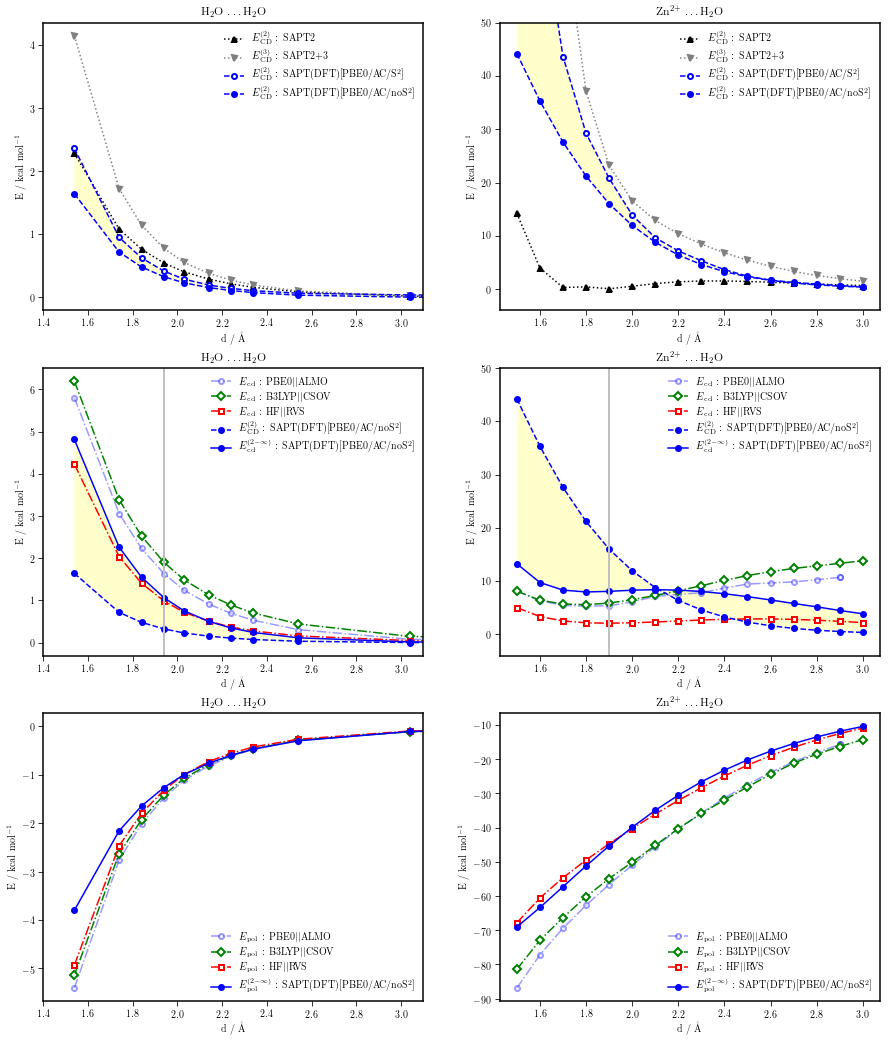

In [19]:
#cc_alpha = 0.4 # Control the alpha value of the CCSD(T) curves to stop them from being intrusive
almo_alpha = 0.4
Xlabel = 'd / \u00c5'
Ylabel = 'E / kcal mol$^{-1}$'

#Eint2  = '$E\mathrm{_{int}^{[2]}}$'

#fig = plt.figure(figsize=(21,15)) # taille horizontale x verticale
fig, grph = plt.subplots(3, 2, figsize=(15,3*6))

##########
# H20..H2O
##########

grph[0, 0].plot(d['water2']['d'],abs(sapt2['water2']['Ct']), 
                'k', linestyle=':', marker='^', markerfacecolor='k',
                label=r'$E\mathrm{_{CD}^{(2)}}$ : SAPT2')
grph[0, 0].plot(d['water2']['d'],abs(sapt2p3['water2']['Ct']), 
                'grey', linestyle=':', marker='v', markerfacecolor='grey',
                label=r'$E\mathrm{_{CD}^{(3)}}$ : SAPT2+3')
grph[0, 0].plot(d['water2']['d'],abs(saptdft_pbe0_s2['water2']['CT']), 
                'b', linestyle='--', marker='o', markerfacecolor='white',
                label=r'$E\mathrm{_{CD}^{(2)}}$ : SAPT(DFT)[PBE0/AC/S$^2$]')
grph[0, 0].plot(d['water2']['d'],abs(saptdft_pbe0['water2']['CT']), 
                'b', linestyle='--', marker='o', markerfacecolor='b',
                label=r'$E\mathrm{_{CD}^{(2)}}$ : SAPT(DFT)[PBE0/AC/noS$^2$]')
grph[0, 0].fill_between(d['water2']['d'],abs(saptdft_pbe0['water2']['CT']),
                        abs(saptdft_pbe0_s2['water2']['CT']),
                        alpha=0.2,facecolor='yellow')
grph[0, 0].set_xlabel(Xlabel)
grph[0, 0].set_ylabel(Ylabel)
grph[0, 0].set_xlim(1.4,3.1)
#grph[0, 0].set_ylim(,)
grph[0, 0].legend(loc='upper right',frameon=False)
grph[0, 0].set_title('H$_{2}$O \dots H$_{2}$O')


grph[1, 0].plot(d['water2']['d'],abs(almo['water2']['SCF-Ct1']), 
                'b', linestyle='-.', marker='o',markerfacecolor='white',
                alpha=almo_alpha,
                label=r'$E\mathrm{_{cd}}$ : PBE0$||$ALMO')
grph[1, 0].plot(d['water2']['d'],abs(csov['water2']['Ct']), 
                'g', linestyle='-.', marker='D', markerfacecolor='white',
                label=r'$E\mathrm{_{cd}}$ : B3LYP$||$CSOV')
grph[1, 0].plot(d['water2']['d'],abs(rvs['water2']['Ct']), 
                'r', linestyle='-.', marker='s', markerfacecolor='white',
                label=r'$E\mathrm{_{cd}}$ : HF$||$RVS')
grph[1, 0].plot(d['water2']['d'],abs(saptdft_pbe0['water2']['CT']), 
                'b', linestyle='--', marker='o', markerfacecolor='b',
                label=r'$E\mathrm{_{CD}^{(2)}}$ : SAPT(DFT)[PBE0/AC/noS$^2$]')

grph[1, 0].plot(d['water2']['d'],abs(saptdft_pbe0['water2']['IND']-(inf['water2']['beta3b_i']*0.24)), 
                'b', linestyle='-', marker='o', markerfacecolor='b',
                label=r'$E\mathrm{_{cd}^{(2-\infty)}}$ : SAPT(DFT)[PBE0/AC/noS$^2$]')


grph[1, 0].fill_between(d['water2']['d'],abs(saptdft_pbe0['water2']['CT']),
                        abs(saptdft_pbe0['water2']['IND']-(inf['water2']['beta3b_i']*0.24)),
                        alpha=0.2,facecolor='yellow')
grph[1, 0].axvline(x=1.94, linewidth=2, color='silver',alpha=1)
grph[1, 0].set_xlabel(Xlabel)
grph[1, 0].set_ylabel(Ylabel)
grph[1, 0].set_xlim(1.4,3.1)
#grph[1, 0].set_ylim(,)
grph[1, 0].legend(loc='upper right',frameon=False)
grph[1, 0].set_title('H$_{2}$O \dots H$_{2}$O')

grph[2, 0].plot(d['water2']['d'],almo['water2']['POL'], 
                'b', linestyle='-.', marker='o',markerfacecolor='white',
                alpha=almo_alpha,
                label=r'$E\mathrm{_{pol}}$ : PBE0$||$ALMO')
grph[2, 0].plot(d['water2']['d'],csov['water2']['Pol'], 
                'g', linestyle='-.', marker='D', markerfacecolor='white',
                label=r'$E\mathrm{_{pol}}$ : B3LYP$||$CSOV')
grph[2, 0].plot(d['water2']['d'],rvs['water2']['Pol'], 
                'r', linestyle='-.', marker='s', markerfacecolor='white',
                label=r'$E\mathrm{_{pol}}$ : HF$||$RVS')
#grph[2, 0].plot(d['water2']['d'],abs(saptdft_pbe0['water2']['POL']), 
#                'b', linestyle='--', marker='o', markerfacecolor='white',
#                label=r'$E\mathrm{_{POL}^{(2)}}$ : SAPT(DFT)[PBE0/AC/noS$^2$]')
grph[2, 0].plot(d['water2']['d'],inf['water2']['beta3b_i']*0.24, 
                'b', linestyle='-', marker='o', markerfacecolor='b',
                label=r'$E\mathrm{_{pol}^{(2-\infty)}}$ : SAPT(DFT)[PBE0/AC/noS$^2$]')

grph[2, 0].set_xlabel(Xlabel)
grph[2, 0].set_ylabel(Ylabel)
grph[2, 0].set_xlim(1.4,3.1)
#grph[2, 0].set_ylim(,)
grph[2, 0].legend(loc='lower right',frameon=False)
grph[2, 0].set_title('H$_{2}$O \dots H$_{2}$O')

##########
# Zn..H2O
##########

grph[0, 1].plot(d['zn_h2o']['d'],abs(sapt2['zn_h2o']['Ct']), 
                'k', linestyle=':', marker='^', markerfacecolor='k',
                label=r'$E\mathrm{_{CD}^{(2)}}$ : SAPT2')
grph[0, 1].plot(d['zn_h2o']['d'],abs(sapt2p3['zn_h2o']['Ct']), 
                'grey', linestyle=':', marker='v', markerfacecolor='grey',
                label=r'$E\mathrm{_{CD}^{(3)}}$ : SAPT2+3')
grph[0, 1].plot(d['zn_h2o']['d'],abs(saptdft_pbe0_s2['zn_h2o']['CT']), 
                'b', linestyle='--', marker='o', markerfacecolor='white',
                label=r'$E\mathrm{_{CD}^{(2)}}$ : SAPT(DFT)[PBE0/AC/S$^2$]')
grph[0, 1].plot(d['zn_h2o']['d'],abs(saptdft_pbe0['zn_h2o']['CT']), 
                'b', linestyle='--', marker='o', markerfacecolor='b',
                label=r'$E\mathrm{_{CD}^{(2)}}$ : SAPT(DFT)[PBE0/AC/noS$^2$]')
grph[0, 1].fill_between(d['zn_h2o']['d'],abs(saptdft_pbe0['zn_h2o']['CT']),
                        abs(saptdft_pbe0_s2['zn_h2o']['CT']),
                        alpha=0.2,facecolor='yellow')
grph[0, 1].set_xlabel(Xlabel)
grph[0, 1].set_ylabel(Ylabel)
#grph[0, 1].set_xlim(1.6,3.1)
grph[0, 1].set_ylim(-4,50)
grph[0, 1].legend(loc='upper right',frameon=False)
grph[0, 1].set_title('Zn$^{2+}$ \dots H$_{2}$O')

grph[1, 1].plot(almo['zn_h2o']['d'],abs(almo['zn_h2o']['SCF-Ct1']), 
                'b', linestyle='-.', marker='o',markerfacecolor='white',
                alpha=almo_alpha,
                label=r'$E\mathrm{_{cd}}$ : PBE0$||$ALMO')
grph[1, 1].plot(d['zn_h2o']['d'],abs(csov['zn_h2o']['Ct']), 
                'g', linestyle='-.', marker='D', markerfacecolor='white',
                label=r'$E\mathrm{_{cd}}$ : B3LYP$||$CSOV')
grph[1, 1].plot(d['zn_h2o']['d'],abs(rvs['zn_h2o']['Ct']), 
                'r', linestyle='-.', marker='s', markerfacecolor='white',
                label=r'$E\mathrm{_{cd}}$ : HF$||$RVS')
grph[1, 1].plot(d['zn_h2o']['d'],abs(saptdft_pbe0['zn_h2o']['CT']), 
                'b', linestyle='--', marker='o', markerfacecolor='b',
                label=r'$E\mathrm{_{CD}^{(2)}}$ : SAPT(DFT)[PBE0/AC/noS$^2$]')

grph[1, 1].plot(d['zn_h2o']['d'],abs(saptdft_pbe0['zn_h2o']['IND']-(inf['zn_h2o']['pol-TTs']*0.24)), 
                'b', linestyle='-', marker='o', markerfacecolor='b',
                label=r'$E\mathrm{_{cd}^{(2-\infty)}}$ : SAPT(DFT)[PBE0/AC/noS$^2$]')


grph[1, 1].fill_between(d['zn_h2o']['d'],abs(saptdft_pbe0['zn_h2o']['CT']),
                        abs(saptdft_pbe0['zn_h2o']['IND']-(inf['zn_h2o']['pol-TTs']*0.24)),
                        alpha=0.2,facecolor='yellow')
grph[1, 1].axvline(x=1.90, linewidth=2, color='silver',alpha=1)
grph[1, 1].set_xlabel(Xlabel)
grph[1, 1].set_ylabel(Ylabel)
#grph[1, 1].set_xlim(1.4,3.1)
grph[1, 1].set_ylim(-4,50)
grph[1, 1].legend(loc='upper right',frameon=False)
grph[1, 1].set_title('Zn$^{2+}$ \dots H$_{2}$O')

grph[2, 1].plot(almo['zn_h2o']['d'],almo['zn_h2o']['POL'], 
                'b', linestyle='-.', marker='o',markerfacecolor='white',
                alpha=almo_alpha,
                label=r'$E\mathrm{_{pol}}$ : PBE0$||$ALMO')
grph[2, 1].plot(d['zn_h2o']['d'],csov['zn_h2o']['Pol'], 
                'g', linestyle='-.', marker='D', markerfacecolor='white',
                label=r'$E\mathrm{_{pol}}$ : B3LYP$||$CSOV')
grph[2, 1].plot(d['zn_h2o']['d'],rvs['zn_h2o']['Pol'], 
                'r', linestyle='-.', marker='s', markerfacecolor='white',
                label=r'$E\mathrm{_{pol}}$ : HF$||$RVS')
#grph[2, 0].plot(d['zn_h2o']['d'],abs(saptdft_pbe0['zn_h2o']['POL']), 
#                'b', linestyle='--', marker='o', markerfacecolor='white',
#                label=r'$E\mathrm{_{POL}^{(2)}}$ : SAPT(DFT)[PBE0/AC/noS$^2$]')
grph[2, 1].plot(d['zn_h2o']['d'],inf['zn_h2o']['pol-TTs']*0.24, 
                'b', linestyle='-', marker='o', markerfacecolor='b',
                label=r'$E\mathrm{_{pol}^{(2-\infty)}}$ : SAPT(DFT)[PBE0/AC/noS$^2$]')

grph[2, 1].set_xlabel(Xlabel)
grph[2, 1].set_ylabel(Ylabel)
#grph[2, 1].set_xlim(1.4,3.1)
#grph[2, 1].set_ylim(-4,50)
grph[2, 1].legend(loc='lower right',frameon=False)
grph[2, 1].set_title('Zn$^{2+}$ \dots H$_{2}$O')


In [20]:
#fig.savefig('CD_POL_from_SAPTDFT_and_EDAs.pdf')

In [21]:
inf['zn_h2o']['pol-TTs']*0.24

0    -69.0480
1    -63.3600
2    -57.2880
3    -51.2160
4    -45.3600
5    -39.9120
6    -34.9680
7    -30.5520
8    -26.6400
9    -23.2200
10   -20.2440
11   -17.6664
12   -15.4392
13   -13.5216
14   -11.8656
15   -10.4400
Name: pol-TTs, dtype: float64

In [23]:
saptdft_pbe0['zn_h2o']['IND']-(inf['zn_h2o']['pol-TTs']*0.24)

0    -13.25814
1     -9.74873
2     -8.32111
3     -7.97207
4     -8.08992
5     -8.30350
6     -8.40412
7     -8.32030
8     -8.06681
9     -7.64313
10    -7.09736
11    -6.47881
12    -5.81972
13    -5.18824
14    -4.50117
15    -3.88264
dtype: float64

In [24]:
inf['water2']['beta3b_i']*0.24

0    -3.800688
1    -2.159736
2    -1.648152
3    -1.267296
4    -1.000536
5    -0.765528
6    -0.601176
7    -0.475272
8    -0.302880
9    -0.109248
10   -0.020880
11   -0.005760
Name: beta3b_i, dtype: float64

In [25]:
saptdft_pbe0['water2']['IND']-(inf['water2']['beta3b_i']*0.24)

0    -4.814292
1    -2.262464
2    -1.552538
3    -1.066824
4    -0.755324
5    -0.506192
6    -0.349494
7    -0.241698
8    -0.116040
9    -0.018592
10    0.000020
11    0.000200
dtype: float64